In [1]:
from ml_learn.linear_models import AnalyticLinearRegression
from ml_learn.linear_models import GradientDescentRegression, LogisticRegression
from ml_learn.utils.regression_metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from ml_learn.utils.classification_metrics import accuracy, precision, recall

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import base64
from IPython.display import Image, display

# Regression tests

In [2]:
data = fetch_california_housing(as_frame=True)
X = pd.DataFrame(data.data, columns=data.feature_names).values
y = data.target.values

In [3]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [5]:
sklearn_reg = LinearRegression()
sklearn_reg.fit(X_train, y_train)
sk_pred = sklearn_reg.predict(X_test)

In [6]:
def reg_test_with_sklearn(y_pred, sk_y_pred, y_true):
    metrics = np.array([mean_squared_error(y_true, y_pred),
               mean_absolute_error(y_true, y_pred),
               mean_absolute_percentage_error(y_true, y_pred)])
    sk_metrics = np.array([mean_squared_error(y_true, sk_y_pred),
                mean_absolute_error(y_true, sk_y_pred),
                mean_absolute_percentage_error(y_true, sk_y_pred)])
    
    print(pd.DataFrame([metrics, sk_metrics, np.abs(metrics-sk_metrics)], index=['ML_LEARN', 'SKLEARN', 'DIFF'], columns=['MSE', 'MAE', 'MAPE']))

## Analytic solution

In [7]:
reg = AnalyticLinearRegression(verbose=True)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Loss: 0.513804516487111
Added intercept
                   MSE           MAE          MAPE
ML_LEARN  5.540440e-01  5.370779e-01  3.175847e+01
SKLEARN   5.540440e-01  5.370779e-01  3.175847e+01
DIFF      4.773959e-15  3.108624e-15  3.410605e-13


## Gradient descent

In [8]:
reg = GradientDescentRegression(verbose=True)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: 5.450015912725015
Epoch 1. Loss: 5.259110648419167
Epoch 2. Loss: 5.075858340377199
Epoch 3. Loss: 4.899947665068949
Epoch 4. Loss: 4.731080191417192
Epoch 5. Loss: 4.568969832447075
Epoch 6. Loss: 4.413342321212326
Epoch 7. Loss: 4.263934709861001
Epoch 8. Loss: 4.120494890760777
Epoch 9. Loss: 3.982781138657917
Epoch 10. Loss: 3.8505616728951626
Epoch 11. Loss: 3.7236142387622677
Epoch 12. Loss: 3.6017257070986672
Epoch 13. Loss: 3.4846916913111494
Epoch 14. Loss: 3.3723161810104383
Epoch 15. Loss: 3.264411191509495
Epoch 16. Loss: 3.1607964284631356
Epoch 17. Loss: 3.061298966963487
Epoch 18. Loss: 2.9657529444388464
Epoch 19. Loss: 2.87399926673487
Epoch 20. Loss: 2.7858853267867345
Epoch 21. Loss: 2.7012647353190817
Epoch 22. Loss: 2.619997063037356
Epoch 23. Loss: 2.541947593799439
Epoch 24. Loss: 2.4669870882806286
Epoch 25. Loss: 2.3949915576678555
Epoch 26. Loss: 2.325842046940729
Epoch 27. Loss: 2.2594244273176214
Epoch 28. Loss: 2.1956291974646

In [9]:
metrics = reg.get_metrics()
metrics.keys()

dict_keys(['loss'])

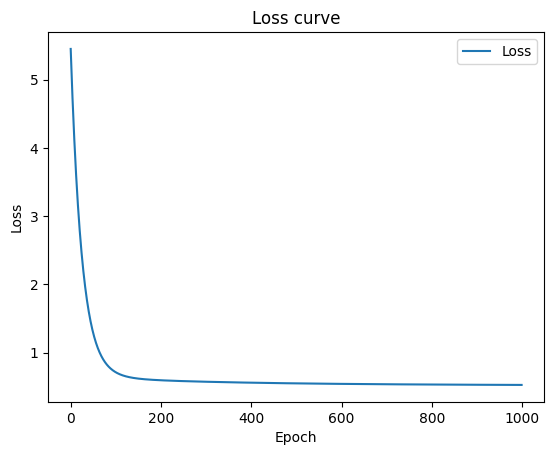

In [10]:
img = base64.b64decode(metrics['loss'])
display( Image(data=img) )

## Gradient descent with batch size 64

In [11]:
reg = GradientDescentRegression(verbose=True, batch_size=64)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: 0.5877969434295554
Epoch 1. Loss: 0.5540838352887069
Epoch 2. Loss: 0.5374001628455843
Epoch 3. Loss: 0.5291662097926468
Epoch 4. Loss: 0.5264731942787809
Epoch 5. Loss: 0.5216103111506629
Epoch 6. Loss: 0.5191322299252851
Epoch 7. Loss: 0.5201726171038904
Epoch 8. Loss: 0.5180334329410029
Epoch 9. Loss: 0.5176875006071142
Epoch 10. Loss: 0.517541369158726
Epoch 11. Loss: 0.5172271796982464
Epoch 12. Loss: 0.5179096765620014
Epoch 13. Loss: 0.5169986086341197
Epoch 14. Loss: 0.5242284986612596
Epoch 15. Loss: 0.516405434977473
Epoch 16. Loss: 0.5188567566503622
Epoch 17. Loss: 0.5171816888877758
Epoch 18. Loss: 0.5171364316672468
Epoch 19. Loss: 0.5178319791556458
Epoch 20. Loss: 0.5178652589955239
Stopped on epoch 20
Added intercept
               MSE       MAE       MAPE
ML_LEARN  0.545155  0.532442  31.037021
SKLEARN   0.554044  0.537078  31.758469
DIFF      0.008889  0.004636   0.721447


## Stochastic gradient descent

In [12]:
reg = GradientDescentRegression(verbose=True, batch_size=1, learning_rate=1e-4)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: 0.6314397227767202
Epoch 1. Loss: 0.5773193007235944
Epoch 2. Loss: 0.5568275633577392
Epoch 3. Loss: 0.545593959993706
Epoch 4. Loss: 0.5353342543393235
Epoch 5. Loss: 0.5294836757627654
Epoch 6. Loss: 0.5265976357405266
Epoch 7. Loss: 0.5261552106244303
Epoch 8. Loss: 0.5215459230563396
Epoch 9. Loss: 0.5211223794797928
Epoch 10. Loss: 0.5194539752608001
Epoch 11. Loss: 0.5188134696364506
Epoch 12. Loss: 0.5185219399261397
Epoch 13. Loss: 0.5182022359787805
Epoch 14. Loss: 0.5198140977429788
Epoch 15. Loss: 0.5196117812863338
Epoch 16. Loss: 0.5170698006065312
Epoch 17. Loss: 0.5192076411622658
Epoch 18. Loss: 0.5177467385881414
Epoch 19. Loss: 0.5170152578573556
Epoch 20. Loss: 0.5171987419469057
Epoch 21. Loss: 0.5174149938234365
Stopped on epoch 21
Added intercept
               MSE       MAE       MAPE
ML_LEARN  0.557679  0.530871  30.800073
SKLEARN   0.554044  0.537078  31.758469
DIFF      0.003635  0.006207   0.958395


# Classification test

In [13]:
np.random.seed(13)

n = 5000
X = np.random.normal(size=(n, 2))
X[:2500, :] += 2
X[2500:, :] -= 2
y = np.array([1] * 2500 + [0] * 2500)

/var/folders/dz/x4fv00d132d3jrjcc5pzcq540000gn/T/ipykernel_51009/2669405996.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
/var/folders/dz/x4fv00d132d3jrjcc5pzcq540000gn/T/ipykernel_51009/2669405996.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 0, 0], X[y == 0, 1], cmap='winter', s=100, label='objects of class y = -1')


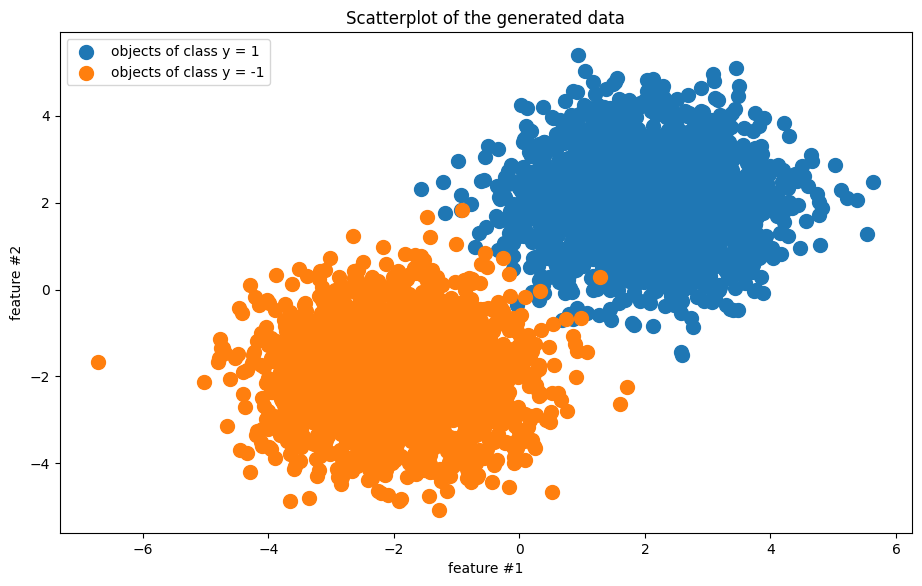

In [14]:
plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [16]:
import sklearn

sklearn_clf = sklearn.linear_model.LogisticRegression()
sklearn_clf.fit(X_train, y_train)
sk_pred = sklearn_clf.predict(X_test)

In [17]:
def clf_test_with_sklearn(y_pred, sk_y_pred, y_true):
    metrics = np.array([accuracy(y_true, y_pred),
               precision(y_true, y_pred),
               recall(y_true, y_pred)])
    sk_metrics = np.array([accuracy(y_true, sk_y_pred),
                precision(y_true, sk_y_pred),
                recall(y_true, sk_y_pred)])
    
    print(pd.DataFrame([metrics, sk_metrics, np.abs(metrics-sk_metrics)], index=['ML_LEARN', 'SKLEARN', 'DIFF'], columns=['ACCURACY', 'PRECISION', 'RECALL']))

## Logistic regression

In [18]:
clf = LogisticRegression(verbose=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
clf_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: -2337.013138065021
Epoch 1. Loss: -2271.9238681368233
Epoch 2. Loss: -2209.7302695329768
Epoch 3. Loss: -2150.295037013614
Epoch 4. Loss: -2093.4850582590225
Epoch 5. Loss: -2039.1717562126785
Stopped on epoch 5
Added intercept
          ACCURACY  PRECISION    RECALL
ML_LEARN     0.996   0.994771  0.997379
SKLEARN      0.998   0.997382  0.998689
DIFF         0.002   0.002611  0.001311


In [19]:
pred[:100]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [20]:
y_test[:100]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])